In [1]:
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

# Main Functions

In [2]:
def get_data(comp, func, inval = "daily", time = "60", ty = "high"):
    key = "1GRE5ATJV155F9RM"
    #No Time Period
    if func in ["MAMA","MACD","APO","PPO","HT_TRENDLINE", "HT_SINE","HT_TRENDMODE","HT_DCPERIOD","HT_DCPHASE","HT_PHASOR"]:
        return requests.get("https://www.alphavantage.co/query?function="+func+"&symbol="+comp+"&interval="+inval+"&series_type="+ty+"&apikey="+key)
    #No Time Period or Series Type
    if func in ["STOCH","STOCHF","BOP","ULTOSC","SAR","TRANGE", "AD","ADOSC","OBV",]:
        return requests.get("https://www.alphavantage.co/query?function="+func+"&symbol="+comp+"&interval="+inval+"&apikey="+key)
    #No Series Type
    if func in ["WILLR","ADX","ADXR","CCI","AROON","AROONOSC","MFI","DX","MINUS_DI","PLUS_DI","MINUS_DM","PLUS_DM","MIDPRICE","ATR","NATR",]:
        return requests.get("https://www.alphavantage.co/query?function="+func+"&symbol="+comp+"&interval="+inval+"&time_period="+time+"&apikey="+key)
    return requests.get("https://www.alphavantage.co/query?function="+func+"&symbol="+comp+"&interval="+inval+"&time_period="+time+"&series_type="+ty+"&apikey="+key)

In [3]:
def collect(comp, low = 0, high = 4, dic = None, inval = "daily", time = "60", ty = "high"):
    funcs = ["SMA","EMA","WMA","DEMA","TEMA","TRIMA","KAMA","MAMA","T3","MACD","STOCH","STOCHF","RSI","STOCHRSI","WILLR","ADX","ADXR","APO","PPO","MOM","BOP","CCI","CMO","ROC","ROCR","AROON","AROONOSC","MFI","TRIX","ULTOSC","DX","MINUS_DI","PLUS_DI","MINUS_DM","PLUS_DM","BBANDS","MIDPOINT","MIDPRICE","SAR","TRANGE","ATR","NATR","ADOSC","OBV","HT_TRENDLINE","HT_SINE","HT_TRENDMODE","HT_DCPERIOD","HT_DCPHASE","HT_PHASOR"]
    if dic is None:
        fin = get_data(comp, "SMA").json()["Technical Analysis: SMA"]
        fin = pd.DataFrame(fin).transpose()
    else:
        fin = dic
    for func in funcs[low:high]:
        x = pd.DataFrame(get_data(comp, func).json()["Technical Analysis: "+func]).transpose()
        for col in x.columns:
            fin[col] = x[col]
    return fin

In [4]:
def targeted_collect(comp, low = 0, high = 4, dic = None, inval = "daily", time = "60", ty = "high"):
    funcs = ["APO","AROON","BBANDS","MIDPOINT","OBV","HT_SINE","HT_PHASOR"]
    if dic is None:
        fin = get_data(comp, "APO").json()["Technical Analysis: APO"]
        fin = pd.DataFrame(fin).transpose()
    else:
        fin = dic
    for func in funcs[low:high]:
        x = pd.DataFrame(get_data(comp, func).json()["Technical Analysis: "+func]).transpose()
        for col in x.columns:
            fin[col] = x[col]
    return fin

In [5]:
def refine(comp, dest, start = "2019-07-08", end = "2019-01-01"):
    data = targeted_collect(comp, 1,5)
    one = time.time()
    pd.DataFrame([1,2,3,4,5]).to_json(dest)
    while (time.time() - one) < 60:
        a = True
    data = targeted_collect(comp,5,10,data)
    d = data[start:end][["APO","Aroon Down", "Real Middle Band", "MIDPOINT","OBV","SINE","QUADRATURE"]]
    
    #Pulling open/close values
    stock = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+comp+"&outputsize=full&apikey=1GRE5ATJV155F9RM").json() 
    opcl = pd.DataFrame(stock["Time Series (Daily)"]).transpose()[start:end][["1. open","4. close"]]
    r_opcl = opcl.iloc[::-1]
    d["open"] = r_opcl["1. open"]
    d["close"] = r_opcl["4. close"]
    
    #Pulling NASDAQ Values
    n = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NASDAQ:^IXIC&outputsize=full&apikey=1GRE5ATJV155F9RM").json()
    nas = pd.DataFrame(n["Time Series (Daily)"]).transpose().iloc[::-1][end:start]
    for col in nas.columns:
        d["n" + col[3:]] = nas[col]

    d.to_json(dest)
    return pd.read_json(dest, orient = "columns", precise_float = True)

# MSFT Collection

### Data Collection from API. (For updates and initial collection.)
### Each call to collect must be separated by ~45-60 seconds as it is limited by the API.

##### Only use if necessary. (Reading json is preferred)

In [101]:
msft_data = collect("MSFT", 1, 5)

In [102]:
msft_data = collect("MSFT", 5, 10, msft_data)

In [103]:
msft_data = collect("MSFT", 10, 15, msft_data)

In [104]:
msft_data = collect("MSFT", 15, 20, msft_data)

In [105]:
msft_data = collect("MSFT", 20, 25, msft_data)

In [107]:
msft_data = collect("MSFT", 25, 30, msft_data)

In [108]:
msft_data = collect("MSFT", 30, 35, msft_data)

In [109]:
msft_data = collect("MSFT", 35, 40, msft_data)

In [111]:
msft_data = collect("MSFT", 40, 45, msft_data)

In [112]:
msft_data = collect("MSFT", 45, 50, msft_data)

In [113]:
msft_data = collect("MSFT", 50, 52, msft_data)

In [114]:
#No nan after 1999-05-29
msft_data

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,ADOSC,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE
2019-06-25,127.4583,127.4124,129.8480,134.4852,136.1360,127.3791,130.9087,95.8170,116.5393,125.1326,...,7436585.6457,-535609545.0000,131.9976,-0.9430,-0.4315,1,17.2998,205.5646,1.6906,2.1846
2019-06-24,127.1372,127.0673,129.5053,134.0349,135.6365,127.1858,130.5095,95.7128,116.3266,124.8235,...,17428258.2933,-502336457.0000,131.2672,-0.9192,-0.3716,1,16.8982,201.8125,0.8046,1.2224
2019-06-21,126.7902,126.6832,129.1247,133.5028,135.0106,126.9943,129.9764,95.6092,116.1037,124.5160,...,19555207.9393,-522965298.0000,130.5883,-0.8750,-0.2764,1,16.7013,196.0481,0.5195,-0.2917
2019-06-20,126.4648,126.3087,128.7553,132.9850,134.4007,126.8059,129.5025,95.5062,115.8852,124.2096,...,22242491.1763,-559693190.0000,129.9747,-0.8027,-0.1459,1,16.7145,188.3920,0.5239,-3.3359
2019-06-19,126.1489,125.9239,128.3779,132.4418,133.7470,126.6221,129.0307,95.4038,115.6653,123.9040,...,18245374.3832,-592735782.0000,129.4595,-0.6873,0.0276,1,16.8535,178.4185,2.8216,-6.4987
2019-06-18,125.8503,125.5847,128.0474,131.9843,133.2155,126.4406,128.6556,95.3020,115.4606,123.5984,...,11308721.3215,-616480223.0000,128.9998,-0.5347,0.2194,1,16.9120,167.3254,5.8549,-5.0573
2019-06-17,125.5894,125.2574,127.7310,131.5467,132.7092,126.2589,128.3679,95.2007,115.2608,123.2922,...,6125896.6612,-642414681.0000,128.5888,-0.3461,0.4186,1,16.7713,155.2516,7.2020,0.1462
2019-06-14,125.3743,124.9702,127.4571,131.1855,132.3134,126.0750,128.1872,95.0999,115.0742,122.9849,...,10334130.0736,-656932466.0000,128.2804,-0.0956,0.6363,1,16.5812,140.4871,5.7541,4.9414
2019-06-13,125.1236,124.6713,127.1729,130.7982,131.8761,125.8859,127.9638,94.9995,114.8852,122.6759,...,13055031.2507,-674754169.0000,127.9971,0.1945,0.8311,1,16.5904,123.7860,3.0281,6.9234
2019-06-12,124.8864,124.4001,126.9177,130.4636,131.5146,125.6898,127.7872,94.8996,114.7055,122.3650,...,13388027.2801,-691955017.0000,127.7503,0.5108,0.9691,1,16.8193,104.2836,0.2750,6.2825


### Writing/Reading data from json data 

In [128]:
#Writing

#Most Recent Date w/ valid data
recent = "2019-06-24"

#Preferred earliest date for which data is written
start = "2000-01-01"

msft_data[recent:start].to_json("MSFT.json")

In [6]:
#Reading
msft_json = pd.read_json("data\MSFT.json", orient = "columns", precise_float = True)
msft_json

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,ADOSC,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE
2000-01-03,97.8030,101.4761,102.1942,108.5354,115.0188,94.2934,104.6214,90.7683,99.5946,92.1843,...,1.664169e+07,354892700,101.4137,-0.5995,0.1420,1,32.0725,171.8374,4.7693,-7.3696
2000-01-04,98.1685,101.9891,102.8275,109.3130,115.8398,94.7250,105.1816,90.8133,99.7699,92.4895,...,7.568120e+06,327833200,102.8693,-0.6664,0.0560,1,30.7375,176.7904,2.8186,-8.5834
2000-01-05,98.5247,102.4606,103.4243,110.0004,116.5221,95.1938,105.6613,90.8589,99.9359,92.8142,...,5.905285e+06,359863000,104.3646,-0.7327,-0.0368,1,29.5692,182.1116,0.5510,-5.2561
2000-01-06,98.8507,102.8346,103.9274,110.4891,116.9078,95.6918,105.9653,90.9050,100.0752,93.1572,...,1.126070e+06,332374700,105.7763,-0.8153,-0.1670,1,28.6166,189.6149,0.5513,-3.0307
2000-01-07,99.1695,103.1433,104.3667,110.8454,117.0997,96.2145,106.1899,90.9515,100.1970,93.5171,...,5.699023e+06,363381500,107.0791,-0.8993,-0.3266,1,27.8664,199.0621,-0.4015,-4.2559
2000-01-10,99.5272,103.4891,104.8428,111.2731,117.4016,96.7599,106.5001,90.9984,100.3319,93.8926,...,5.325025e+06,385863300,108.3595,-0.9635,-0.4920,1,27.2771,209.4721,-1.3268,-3.1438
2000-01-11,99.9345,103.8420,105.3255,111.7120,117.7227,97.3280,106.8955,91.0457,100.4711,94.2827,...,-9.295534e+05,362491500,109.3991,-0.9911,-0.6068,1,26.8644,217.3553,-1.7305,-4.3837
2000-01-12,100.2823,104.0068,105.6185,111.7782,117.4966,97.9109,106.9722,91.0933,100.5551,94.6854,...,-7.441695e+06,329225300,110.1663,-0.9998,-0.7225,1,26.6304,226.2601,-3.3278,-4.9490
2000-01-13,100.6052,104.1581,105.8919,111.8210,117.2469,98.5043,107.0310,91.1410,100.6357,95.0988,...,7.886014e+05,370797300,110.7373,-0.9815,-0.8294,0,26.5695,236.0371,-4.4691,-3.6489
2000-01-14,100.9647,104.4788,106.3291,112.2007,117.5057,99.1128,107.3070,91.1891,100.7688,95.5218,...,1.094346e+07,407505500,111.3042,-0.9347,-0.9123,0,26.6840,245.8257,-5.7053,-0.6896


In [7]:
#Performed SVD on data and takes top 3 eigenvalue-eigenvector pairs in best_msft.

msft = np.array(msft_json["1999-05-30":"2019-06-24"], dtype = float)
c_msft = msft - msft.mean(axis=0)
u_msft, s_msft, v_msft = np.linalg.svd(c_msft, compute_uv = True)
evals_msft = np.power(s_msft,2)/(msft.shape[0])
evecs_msft = v_msft.transpose()
comb_msft = [(evals_msft[k], evecs_msft[k]) for k in range(evals_msft.shape[0])]
best_msft = sorted(comb_msft, key= lambda i : i[0], reverse = True)[0:3]

In [8]:
top_msft = best_msft[0:3]
vect_msft = [k[1] for k in top_msft]

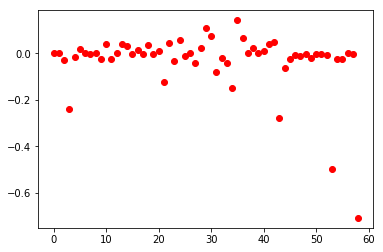

In [18]:
#Plot of the various measurements against their corrensponding value in the dominent SVD eigenvector.

plt.plot(vect_msft[0],"ro")
plt.show()

In [48]:
#The measurements that take on a value greater than 0.1 or less than -0.1 within the top three eigenvectors.

outlie_msft = [np.where(vect_msft[k] > 0.1, vect_msft[k], np.where(vect_msft[k] < -0.1, vect_msft[k], 0)) for k in range(len(vect_msft))]
nonz_msft = [np.array([k for k in range(outlie_msft[j].shape[0]) if outlie_msft[j][k] != 0]) for j in range(len(outlie_msft))]
nonz_msft

[array([ 3, 21, 29, 34, 35, 43, 53, 58]),
 array([ 3, 32, 33, 42, 45, 47, 49, 50, 51]),
 array([ 3, 43, 47, 49, 51, 52])]

In [21]:
match2_msft = np.array(sorted(set([k for k in nonz_msft[0] if k in nonz_msft[1]] + [k for k in nonz_msft[1] if k in nonz_msft[2]] + [k for k in nonz_msft[0] if k in nonz_msft[2]])))
match3_msft = np.array(sorted(set([k for k in nonz_msft[0] if k in nonz_msft[1] and k in nonz_msft[2]])))

print("Results for MSFT:")
print("\nOutlying Dimensions for Most Signifigant Eigenvector: ", nonz_msft[0])
print("Corresponding Dimension Names:", np.array([msft_json.columns[k] for k in nonz_msft[0]]))
print("\nDimensions Matching 2+ Eigenvectors: ", match2_msft)
print("Corresponding Dimension Names: ", np.array([msft_json.columns[k] for k in match2_msft]))
print("\nDimensions Matching Top 3 Eigenvectors: ", match3_msft)
print("Corresponding Demension Names:", np.array([msft_json.columns[k] for k in match3_msft]))

Results for MSFT:

Outlying Dimensions for Most Signifigant Eigenvector:  [ 3 21 29 34 35 43 53 58]
Corresponding Dimension Names: ['DEMA' 'APO' 'Aroon Down' 'ULTOSC' 'DX' 'MIDPOINT' 'SINE' 'QUADRATURE']

Dimensions Matching 2+ Eigenvectors:  [ 3 43 47 49 51]
Corresponding Dimension Names:  ['DEMA' 'MIDPOINT' 'ATR' 'ADOSC' 'HT_TRENDLINE']

Dimensions Matching Top 3 Eigenvectors:  [3]
Corresponding Demension Names: ['DEMA']


# GOOGL Collection

## Gather Data
##### Each call to collect must be separated by ~45-60 seconds.

In [17]:
googl_data = collect("GOOGL", 1,5)

In [18]:
googl_data = collect("GOOGL",5,10, googl_data)

In [19]:
googl_data = collect("GOOGL",10,15, googl_data)

In [20]:
googl_data = collect("GOOGL",15,20, googl_data)

In [21]:
googl_data = collect("GOOGL",20,25, googl_data)

In [22]:
googl_data = collect("GOOGL",25,30, googl_data)

In [23]:
googl_data = collect("GOOGL",30,35, googl_data)

In [24]:
googl_data = collect("GOOGL",35,40, googl_data)

In [25]:
googl_data = collect("GOOGL",40,45, googl_data)

In [26]:
googl_data = collect("GOOGL",45,50, googl_data)

In [27]:
googl_data = collect("GOOGL",50,52, googl_data)

In [28]:
#Writing

#Most Recent Date w/ valid data
recent = "2019-06-21"

#Preferred earliest date for which data is written
start = "2005-01-01"

googl_data[recent:start].to_json("GOOGL.json")

In [9]:
#Reading
googl_json = pd.read_json("data\GOOGL.json", orient = "columns", precise_float = True)
googl_json

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,ADOSC,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE
2005-01-03,177.8693,170.5401,183.3810,NaN,NaN,179.8864,185.9970,17.7758,95.0905,NaN,...,1.045927e+07,329211100,186.8941,-0.8355,-0.2023,1,16.1157,191.6690,4.6750,1.1599
2005-01-04,178.9235,171.6020,184.2027,NaN,NaN,180.2423,186.9713,18.1678,96.1689,NaN,...,4.918884e+06,301726900,188.1965,-0.8211,-0.1769,1,16.6884,190.1905,5.3550,0.2643
2005-01-05,179.8908,172.4315,184.7921,NaN,NaN,180.5952,187.4591,18.5628,97.1762,NaN,...,-1.606404e+05,285270200,189.1216,-0.8309,-0.1941,1,17.6064,191.1911,4.6232,0.9037
2005-01-06,180.8623,173.2009,185.3169,NaN,NaN,180.9420,187.8770,18.9608,98.1635,NaN,...,-7.487334e+06,264516800,189.7603,-0.8565,-0.2406,1,18.8640,193.9221,5.6818,2.7575
2005-01-07,181.7073,173.8911,185.7559,NaN,NaN,181.2714,188.1439,19.3616,99.1243,NaN,...,-4.559425e+06,283823200,189.8147,-0.8791,-0.2845,1,20.4133,196.5298,6.7376,0.5371
2005-01-10,182.6360,174.6848,186.2933,NaN,NaN,181.5841,188.6113,19.7654,100.1141,NaN,...,-2.801905e+06,298887300,189.6185,-0.8863,-0.2992,1,22.2289,197.4125,6.9955,-2.7166
2005-01-11,183.5062,175.4397,186.7876,NaN,NaN,181.8722,189.0081,20.1720,101.0900,NaN,...,-5.548888e+06,284983900,189.5821,-0.9079,-0.3455,1,23.7551,200.2127,6.3252,-12.9088
2005-01-12,184.2850,176.1115,187.1949,NaN,NaN,182.1339,189.2710,20.5814,102.0384,NaN,...,-2.022544e+06,301323100,189.6713,-0.9298,-0.3973,1,24.6251,203.4106,0.0779,-19.5995
2005-01-13,185.0348,176.8092,187.6246,NaN,NaN,182.3752,189.5672,20.9934,102.9920,NaN,...,-1.412965e+06,287638000,189.6540,-0.9245,-0.3843,1,25.9130,202.5974,-5.1446,-11.6891
2005-01-14,185.8852,177.5699,188.1156,NaN,NaN,182.6041,190.0212,21.4083,103.9621,NaN,...,5.010072e+06,306899300,189.6005,-0.9086,-0.3472,1,27.7173,200.3176,-6.8626,-0.1232


In [10]:
googl = np.array(googl_json["2006-02-01":], dtype = float)
c_googl = googl - googl.mean(axis=0)
u_googl, s_googl, v_googl = np.linalg.svd(c_googl, compute_uv = True)
evals_googl = np.power(s_googl,2)/(googl.shape[0])
evecs_googl = v_googl.transpose()
comb_googl = [(evals_googl[k], evecs_googl[k]) for k in range(evals_googl.shape[0])]
best_googl = sorted(comb_googl, key= lambda i : i[0], reverse = True)[0:3]

In [11]:
top_googl = best_googl[0:3]
vect_googl = [k[1] for k in top_googl]

In [25]:
outlie_googl = [np.where(vect_googl[k] > 0.1, vect_googl[k], np.where(vect_googl[k] < -0.1, vect_googl[k], 0)) for k in range(len(vect_googl))]
nonz_googl = [np.array([k for k in range(outlie_googl[j].shape[0]) if outlie_googl[j][k] != 0]) for j in range(len(outlie_googl))]
nonz_googl

[array([ 2, 12, 21, 29, 30, 32, 53, 58]),
 array([ 2, 15, 16, 20, 22, 29, 37, 38, 39, 40, 42, 44, 45, 50]),
 array([ 2, 12, 29, 30, 39, 40, 44, 45, 48, 50, 51])]

In [27]:
match2_googl = np.array(sorted(set([k for k in nonz_googl[0] if k in nonz_googl[1]] + [k for k in nonz_googl[1] if k in nonz_googl[2]] + [k for k in nonz_googl[0] if k in nonz_googl[2]])))
match3_googl = np.array(sorted(set([k for k in nonz_googl[0] if k in nonz_googl[1] and k in nonz_googl[2]])))

print("Results for GOOGL:")
print("\nOutlying Dimensions for Most Signifigant Eigenvector: ", nonz_googl[0])
print("Corresponding Dimension Names:", np.array([googl_json.columns[k] for k in nonz_googl[0]]))
print("\nDimensions Matching 2+ Eigenvectors: ", match2_googl)
print("Corresponding Dimension Names: ", np.array([googl_json.columns[k] for k in match2_googl]))
print("\nDimensions Matching Top 3 Eigenvectors: ", match3_googl)
print("Corresponding Demension Names:", np.array([googl_json.columns[k] for k in match3_googl]))

Results for GOOGL:

Outlying Dimensions for Most Signifigant Eigenvector:  [ 2 12 21 29 30 32 53 58]
Corresponding Dimension Names: ['WMA' 'MACD_Signal' 'APO' 'Aroon Down' 'Aroon Up' 'MFI' 'SINE'
 'QUADRATURE']

Dimensions Matching 2+ Eigenvectors:  [ 2 12 29 30 39 40 44 45 50]
Corresponding Dimension Names:  ['WMA' 'MACD_Signal' 'Aroon Down' 'Aroon Up' 'PLUS_DM' 'Real Lower Band'
 'MIDPRICE' 'SAR' 'OBV']

Dimensions Matching Top 3 Eigenvectors:  [ 2 29]
Corresponding Demension Names: ['WMA' 'Aroon Down']


In [29]:
print("Shared outlying dimensions between MSFT and GOOGL: ", np.array([k for k in nonz_googl[0] if k in nonz_msft[0]]))
print("Corresponding titles: ", np.array([googl_json.columns[j] for j in np.array([k for k in nonz_googl[0] if k in nonz_msft[0]])]))
    

Shared outlying dimensions between MSFT and GOOGL:  [21 29 53 58]
Corresponding titles:  ['APO' 'Aroon Down' 'SINE' 'QUADRATURE']


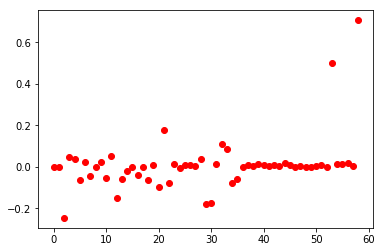

In [30]:
plt.plot(vect_googl[0], "ro")
plt.show()

# QUMU Collection

### Gather Data

In [36]:
qumu_data = collect("QUMU", 1,5)

In [38]:
qumu_data = collect("QUMU", 5,10, qumu_data)

In [39]:
qumu_data = collect("QUMU", 10,15, qumu_data)

In [40]:
qumu_data = collect("QUMU", 15,20, qumu_data)

In [41]:
qumu_data = collect("QUMU", 20,25, qumu_data)

In [42]:
qumu_data = collect("QUMU", 25,30, qumu_data)

In [43]:
qumu_data = collect("QUMU", 30,35, qumu_data)

In [44]:
qumu_data = collect("QUMU", 35,40, qumu_data)

In [45]:
qumu_data = collect("QUMU", 40,45, qumu_data)

In [46]:
qumu_data = collect("QUMU", 45,50, qumu_data)

In [47]:
qumu_data = collect("QUMU", 50,52, qumu_data)

In [48]:
#Writing

#Most Recent Date w/ valid data
recent = "2019-06-21"

#Preferred earliest date for which data is written
start = "2005-01-01"

qumu_data[recent:start].to_json("QUMU.json")

In [14]:
#Reading
qumu_json = pd.read_json("data\QUMU.json", orient = "columns", precise_float = True)
qumu_json

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,ADOSC,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE
2005-01-03,15.2243,15.2804,15.5678,15.9471,16.3407,15.2965,15.5747,13.3145,14.7071,14.4632,...,22402.9278,3076516,15.8090,-0.8737,-0.2737,0,18.4387,195.8871,0.1098,-0.3988
2005-01-04,15.2597,15.3108,15.6001,15.9852,16.3733,15.3293,15.6069,13.3215,14.7221,14.5081,...,18798.7112,3063816,15.8433,-0.9498,-0.4503,1,18.3501,206.7622,0.0473,-0.2824
2005-01-05,15.2943,15.3357,15.6267,16.0120,16.3893,15.3615,15.6296,13.3286,14.7356,14.5532,...,17810.7398,3070716,15.8762,-0.9933,-0.6205,1,18.2671,218.3561,-0.0487,-0.2857
2005-01-06,15.3362,15.3739,15.6662,16.0649,16.4441,15.3934,15.6816,13.3357,14.7532,14.5985,...,12938.8469,3089616,15.9206,-0.9995,-0.7301,1,18.2286,226.8974,-0.1566,-0.0831
2005-01-07,15.3708,15.3971,15.6906,16.0878,16.4543,15.4242,15.6985,13.3429,14.7665,14.6438,...,5555.3996,3059816,15.9633,-0.9837,-0.8226,1,18.2599,235.3438,-0.1160,0.0875
2005-01-10,15.3977,15.4299,15.7244,16.1299,16.4932,15.4541,15.7214,13.3501,14.7828,14.6892,...,-3962.2755,3113416,16.0102,-0.9595,-0.8777,1,18.3068,241.3713,-0.0858,0.2428
2005-01-11,15.4225,15.4568,15.7523,16.1598,16.5142,15.4834,15.7368,13.3573,14.7975,14.7346,...,-10702.9357,3102216,16.0583,-0.9524,-0.8890,1,18.3012,242.7511,0.0584,0.2696
2005-01-12,15.4487,15.4792,15.7758,16.1808,16.5222,15.5122,15.7494,13.3646,14.8109,14.7800,...,-13887.9325,3089716,16.1009,-0.9905,-0.7976,1,18.2174,232.9033,0.1015,0.2140
2005-01-13,15.4780,15.4979,15.7955,16.1946,16.5201,15.5405,15.7607,13.3719,14.8233,14.8253,...,-12195.0929,3096616,16.1383,-0.7576,-0.0741,1,18.0646,184.2501,0.2242,0.1166
2005-01-14,15.5097,15.5275,15.8258,16.2300,16.5503,15.5684,15.7867,13.3792,14.8391,14.8706,...,-4576.3903,3125516,16.1616,-0.3956,0.3697,1,17.8801,158.3052,0.1797,-0.2103


In [15]:
qumu = np.array(qumu_json, dtype = float)
c_qumu = qumu - qumu.mean(axis=0)
u_qumu, s_qumu, v_qumu = np.linalg.svd(c_qumu, compute_uv = True)
evals_qumu = np.power(s_qumu,2)/(qumu.shape[0])
evecs_qumu = v_qumu.transpose()
comb_qumu = [(evals_qumu[k], evecs_qumu[k]) for k in range(evals_qumu.shape[0])]
best_qumu = sorted(comb_qumu, key= lambda i : i[0], reverse = True)[0:3]

In [16]:
top_qumu = best_qumu[0:3]
vect_qumu = [k[1] for k in top_qumu]

In [34]:
outlie_qumu = [np.where(vect_qumu[k] > 0.1, vect_qumu[k], np.where(vect_qumu[k] < -0.1, vect_qumu[k], 0)) for k in range(len(vect_qumu))]
nonz_qumu = [np.array([k for k in range(outlie_qumu[j].shape[0]) if outlie_qumu[j][k] != 0]) for j in range(len(outlie_qumu))]
nonz_qumu

[array([ 7, 39, 41, 43, 44, 53, 58]),
 array([ 7, 33, 34, 36, 40, 41, 43, 48, 50, 51]),
 array([ 7, 43, 48, 50, 51, 52])]

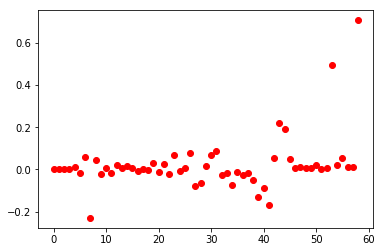

In [35]:
plt.plot(vect_qumu[0], "ro")
plt.show()

In [37]:
match2_qumu = np.array(sorted(set([k for k in nonz_qumu[0] if k in nonz_qumu[1]] + [k for k in nonz_qumu[1] if k in nonz_qumu[2]] + [k for k in nonz_qumu[0] if k in nonz_qumu[2]])))
match3_qumu = np.array(sorted(set([k for k in nonz_qumu[0] if k in nonz_qumu[1] and k in nonz_qumu[2]])))

print("Results for QUMU:")
print("\nOutlying Dimensions for Most Signifigant Eigenvector: ", nonz_qumu[0])
print("Corresponding Dimension Names:", np.array([qumu_json.columns[k] for k in nonz_qumu[0]]))
print("\nDimensions Matching 2+ Eigenvectors: ", match2_qumu)
print("Corresponding Dimension Names: ", np.array([qumu_json.columns[k] for k in match2_qumu]))
print("\nDimensions Matching Top 3 Eigenvectors: ", match3_qumu)
print("Corresponding Demension Names:", np.array([qumu_json.columns[k] for k in match3_qumu]))

Results for QUMU:

Outlying Dimensions for Most Signifigant Eigenvector:  [ 7 39 41 43 44 53 58]
Corresponding Dimension Names: ['FAMA' 'PLUS_DM' 'Real Middle Band' 'MIDPOINT' 'MIDPRICE' 'SINE'
 'QUADRATURE']

Dimensions Matching 2+ Eigenvectors:  [ 7 41 43 48 50 51]
Corresponding Dimension Names:  ['FAMA' 'Real Middle Band' 'MIDPOINT' 'NATR' 'OBV' 'HT_TRENDLINE']

Dimensions Matching Top 3 Eigenvectors:  [ 7 43]
Corresponding Demension Names: ['FAMA' 'MIDPOINT']


# Social Reality Collection

In [56]:
sr_data = collect("SRAX", 1,5)

In [58]:
sr_data = collect("SRAX", 5,10, sr_data)

In [59]:
sr_data = collect("SRAX", 10,15, sr_data)

In [61]:
sr_data = collect("SRAX", 15,20, sr_data)

In [62]:
sr_data = collect("SRAX", 20,25, sr_data)

In [63]:
sr_data = collect("SRAX", 25,30, sr_data)

In [64]:
sr_data = collect("SRAX", 30,35, sr_data)

In [65]:
sr_data = collect("SRAX", 35,40, sr_data)

In [67]:
sr_data = collect("SRAX", 40,45, sr_data)

In [68]:
sr_data = collect("SRAX", 45,50, sr_data)

In [69]:
sr_data = collect("SRAX", 50,52, sr_data)

In [70]:
#Writing

#Most Recent Date w/ valid data
recent = "2019-06-21"

#Preferred earliest date for which data is written
start = "2005-01-01"

sr_data[recent:start].to_json("SRAX.json")

In [17]:
#Reading
sr_json = pd.read_json("data\SRAX.json", orient = "columns", precise_float = True)
sr_json

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,ADOSC,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE
2013-02-28,1.0192,1.0192,1.0098,NaN,NaN,1.0192,NaN,0.0475,0.3871,NaN,...,-1.1530,12000,NaN,NaN,NaN,0,20.3380,NaN,-0.0000,-0.0000
2013-03-01,1.0190,1.0185,1.0091,NaN,NaN,1.0180,1.0000,0.0492,0.3932,NaN,...,-0.9433,12000,NaN,NaN,NaN,0,20.3908,NaN,-0.0000,0.0000
2013-03-04,1.0148,1.0179,1.0085,NaN,NaN,1.0167,1.0000,0.0510,0.3993,NaN,...,-0.7718,12000,NaN,NaN,NaN,0,20.4377,NaN,-0.0000,0.0000
2013-03-05,1.0117,1.0173,1.0080,NaN,NaN,1.0158,1.0000,0.0527,0.4053,NaN,...,-0.6315,12000,NaN,NaN,NaN,0,20.4788,NaN,-0.0000,-0.0000
2013-03-06,1.0113,1.0168,1.0076,NaN,NaN,1.0150,1.0000,0.0545,0.4112,NaN,...,-0.5167,12000,1.0000,0.7857,0.1181,1,20.5146,6.7839,-0.0000,0.0000
2013-03-07,1.0110,1.0162,1.0073,NaN,NaN,1.0143,1.0000,0.0563,0.4171,NaN,...,-0.4227,12000,1.0000,0.7238,0.0239,1,20.5457,1.3711,-0.0000,-0.0000
2013-03-08,1.0108,1.0157,1.0069,NaN,NaN,1.0136,1.0000,0.0582,0.4229,NaN,...,-0.3459,12000,1.0000,0.7769,0.1041,1,20.5725,5.9769,-0.0000,-0.0000
2013-03-11,1.0107,1.0152,1.0065,NaN,NaN,1.0129,1.0000,0.0600,0.4287,NaN,...,-0.2830,12000,1.0000,0.8006,0.1424,1,20.5954,8.1879,-0.0000,0.0000
2013-03-12,1.0105,1.0147,1.0062,NaN,NaN,1.0122,1.0000,0.0619,0.4344,NaN,...,-0.2315,12000,1.0000,0.7445,0.0543,1,20.6150,3.1149,-0.0000,-0.0000
2013-03-13,1.0102,1.0142,1.0059,NaN,NaN,1.0115,1.0000,0.0638,0.4401,NaN,...,-0.1894,12000,1.0000,0.7349,0.0401,1,20.6317,2.2991,-0.0000,-0.0000


In [18]:
sr = np.array(sr_json["2014-06-01":], dtype = float)
c_sr = sr - sr.mean(axis=0)
u_sr, s_sr, v_sr = np.linalg.svd(c_sr, compute_uv = True)
evals_sr = np.power(s_sr,2)/(sr.shape[0])
evecs_sr = v_sr.transpose()
comb_sr = [(evals_sr[k], evecs_sr[k]) for k in range(evals_sr.shape[0])]
best_sr = sorted(comb_sr, key= lambda i : i[0], reverse = True)[0:3]

In [19]:
top_sr = best_sr[0:3]
vect_sr = [k[1] for k in top_sr]

In [41]:
outlie_sr = [np.where(vect_sr[k] > 0.1, vect_sr[k], np.where(vect_sr[k] < -0.1, vect_sr[k], 0)) for k in range(len(vect_sr))]
nonz_sr = [np.array([k for k in range(outlie_sr[j].shape[0]) if outlie_sr[j][k] != 0]) for j in range(len(outlie_sr))]
nonz_sr

[array([20, 21, 34, 36, 41, 43, 45, 53, 58]),
 array([20, 21, 39, 43, 44, 45, 49, 50, 51]),
 array([20, 21, 34, 38, 43, 44, 48, 49, 50, 51, 52])]

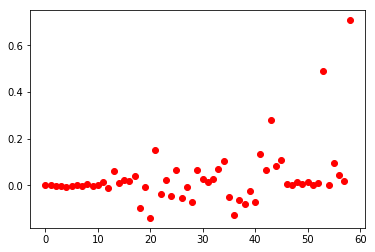

In [42]:
plt.plot(vect_sr[0], "ro")
plt.show()

In [44]:
match2_sr = np.array(sorted(set([k for k in nonz_sr[0] if k in nonz_sr[1]] + [k for k in nonz_sr[1] if k in nonz_sr[2]] + [k for k in nonz_sr[0] if k in nonz_sr[2]])))
match3_sr = np.array(sorted(set([k for k in nonz_sr[0] if k in nonz_sr[1] and k in nonz_sr[2]])))

print("Results for SRAX:")
print("\nOutlying Dimensions for Most Signifigant Eigenvector: ", nonz_sr[0])
print("Corresponding Dimension Names:", np.array([sr_json.columns[k] for k in nonz_sr[0]]))
print("\nDimensions Matching 2+ Eigenvectors: ", match2_sr)
print("Corresponding Dimension Names: ", np.array([sr_json.columns[k] for k in match2_sr]))
print("\nDimensions Matching Top 3 Eigenvectors: ", match3_sr)
print("Corresponding Demension Names:", np.array([sr_json.columns[k] for k in match3_sr]))

Results for SRAX:

Outlying Dimensions for Most Signifigant Eigenvector:  [20 21 34 36 41 43 45 53 58]
Corresponding Dimension Names: ['ADXR' 'APO' 'ULTOSC' 'MINUS_DI' 'Real Middle Band' 'MIDPOINT' 'SAR'
 'SINE' 'QUADRATURE']

Dimensions Matching 2+ Eigenvectors:  [20 21 34 43 44 45 49 50 51]
Corresponding Dimension Names:  ['ADXR' 'APO' 'ULTOSC' 'MIDPOINT' 'MIDPRICE' 'SAR' 'ADOSC' 'OBV'
 'HT_TRENDLINE']

Dimensions Matching Top 3 Eigenvectors:  [20 21 43]
Corresponding Demension Names: ['ADXR' 'APO' 'MIDPOINT']


In [46]:
print("Shared outlying dimensions between QUMU and SRAX: ", np.array([k for k in nonz_qumu[0] if k in nonz_sr[0]]))
print("Corresponding titles: ", np.array([qumu_json.columns[j] for j in np.array([k for k in nonz_qumu[0] if k in nonz_sr[0]])]))
    

Shared outlying dimensions between QUMU and SRAX:  [41 43 53 58]
Corresponding titles:  ['Real Middle Band' 'MIDPOINT' 'SINE' 'QUADRATURE']


# Overall Results

In [72]:
k1 = sorted(set([k for k in nonz_msft[0]] + [k for k in nonz_googl[0]] + [k for k in nonz_qumu[0]] + [k for k in nonz_sr[0]]))
print("All measurments signifigantly present in at least one top eigenvector: \n", k1)
print("Corresponding Titles: \n", [msft_json.columns[k] for k in k1])

k2 = sorted(set([k for k in nonz_msft[0] if k in nonz_googl[0] and k in nonz_qumu[0] and k in nonz_sr[0]]))
print("\nMeasurements signifigantly present in all top eigenvectors: \n", k2)
print("Corresponding Titles: \n", [msft_json.columns[k] for k in k2])

k3 = sorted(set([k for k in match2_msft] + [k for k in match2_googl] + [k for k in match2_qumu] + [k for k in match2_sr]))
print("\nMeasurements signifigantly present in the top two eigenvectors for at least one stock: \n", k3)
print("Corresponding Titles: \n", [msft_json.columns[k] for k in k3])

km = sorted(set([k for k in nonz_msft[0]] + [k for k in nonz_msft[1]]))
kg = sorted(set([k for k in nonz_googl[0]] + [k for k in nonz_googl[1]]))
kq = sorted(set([k for k in nonz_qumu[0]] + [k for k in nonz_qumu[1]]))
ks = sorted(set([k for k in nonz_sr[0]] + [k for k in nonz_sr[1]]))
ktop = sorted(set([k for k in km if k in kg and k in kq and k in ks]))
print("\nMeasurements signifigantly present in at least one of the top two eigenvectors for every stock: \n", ktop)
print("Corresponding Titles: \n", [msft_json.columns[k] for k in ktop])

All measurments signifigantly present in at least one top eigenvector: 
 [2, 3, 7, 12, 20, 21, 29, 30, 32, 34, 35, 36, 39, 41, 43, 44, 45, 53, 58]
Corresponding Titles: 
 ['WMA', 'DEMA', 'FAMA', 'MACD_Signal', 'ADXR', 'APO', 'Aroon Down', 'Aroon Up', 'MFI', 'ULTOSC', 'DX', 'MINUS_DI', 'PLUS_DM', 'Real Middle Band', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SINE', 'QUADRATURE']

Measurements signifigantly present in all top eigenvectors: 
 [53, 58]
Corresponding Titles: 
 ['SINE', 'QUADRATURE']

Measurements signifigantly present in the top two eigenvectors for at least one stock: 
 [2, 3, 7, 12, 20, 21, 29, 30, 34, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51]
Corresponding Titles: 
 ['WMA', 'DEMA', 'FAMA', 'MACD_Signal', 'ADXR', 'APO', 'Aroon Down', 'Aroon Up', 'ULTOSC', 'PLUS_DM', 'Real Lower Band', 'Real Middle Band', 'MIDPOINT', 'MIDPRICE', 'SAR', 'ATR', 'NATR', 'ADOSC', 'OBV', 'HT_TRENDLINE']

Measurements signifigantly present in at least one of the top two eigenvectors for every stock: 
 [5

## Final Results

Final measurements have been pulled from the data directly above, as well as the pairwise shared measurements between MSFT & GOOGL/ QUMU & SR:

21 - APO

29 - Aroon Down

41 - Real Middle Band

43 - MIDPOINT

50 - OBV

53 - SINE

58 - QUADRATURE


In [76]:
a = pd.read_json("data\AMD-19.json", orient = "columns", precise_float = True)["close"]
b = pd.read_json("data\MSFT-19.json", orient = "columns", precise_float = True)["close"]
d = pd.read_json("data\MSI-19.json", orient = "columns", precise_float = True)["close"]
heat_data = pd.DataFrame({"AMD":a, "MSFT":b, "MSI":d})[:"2019-06-24"]; heat_data

,AMD,MSFT,MSI
2019-01-02,18.83,101.12,114.78
2019-01-03,17.05,97.40,110.76
2019-01-04,19.00,101.93,115.56
2019-01-07,20.57,102.06,116.10
2019-01-08,20.75,102.80,119.51
2019-01-09,20.19,104.27,116.16
2019-01-10,19.74,103.60,117.56
2019-01-11,20.27,102.80,116.00
2019-01-14,20.23,102.05,115.12
2019-01-15,20.38,105.01,115.77


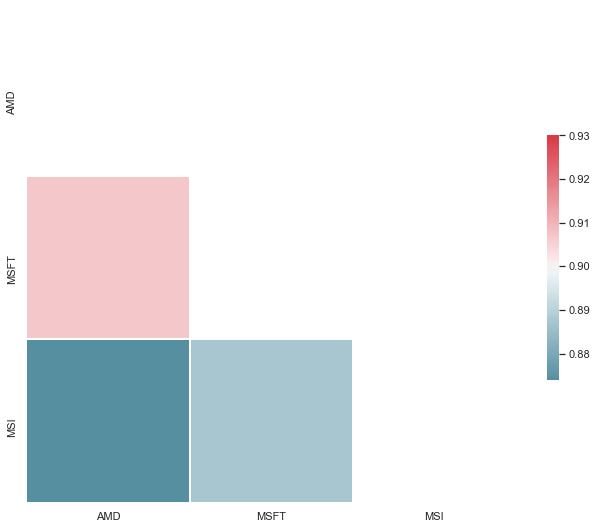

In [129]:
#Heatmap for companies
sns.set(style="white")

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

corr = heat_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.93, center=0.9,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [121]:
v = refine("GOOGL","data\GOOGL-18.json", "2018-12-31","2018-01-01")

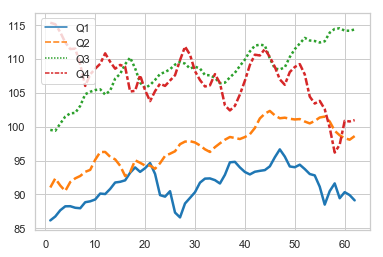

In [130]:
#Quarterly Line Plot
v = pd.read_json("data\MSFT18.json", orient = "columns", precise_float = True)
spring = v["close"]["2018-01-01":"2018-04-03"]
summer = v["close"]["2018-04-03":"2018-06-30"]
fall = v["close"]["2018-07-01":"2018-09-30"]
winter = v["close"]["2018-10-01":"2018-12-31"]
data = pd.DataFrame({"Q1":spring.values, "Q2": summer.values, "Q3": fall.values, "Q4": winter.values})

sns.set(style="whitegrid")
data = data.rolling(2).mean()
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

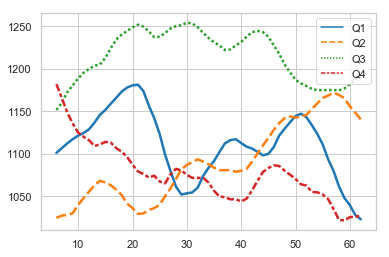

In [126]:
#Quarterly Line Plot
v = pd.read_json("data\GOOGL-18.json", orient = "columns", precise_float = True)
spring = v["close"]["2018-01-01":"2018-04-03"]
summer = v["close"]["2018-04-03":"2018-06-30"]
fall = v["close"]["2018-07-01":"2018-09-30"]
winter = v["close"]["2018-10-01":"2018-12-31"]
data = pd.DataFrame({"Q1":spring.values, "Q2": summer.values, "Q3": fall.values, "Q4": winter.values})

sns.set(style="whitegrid")
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

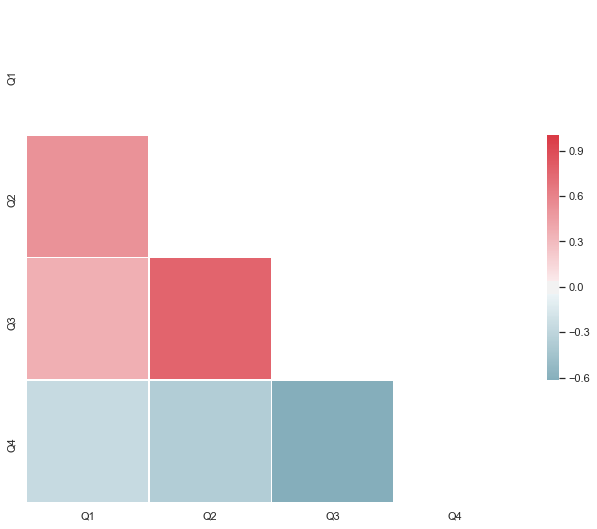

In [133]:
sns.set(style="white")

v = pd.read_json("data\MSFT18.json", orient = "columns", precise_float = True)
spring = v["close"]["2018-01-01":"2018-04-03"]
summer = v["close"]["2018-04-03":"2018-06-30"]
fall = v["close"]["2018-07-01":"2018-09-30"]
winter = v["close"]["2018-10-01":"2018-12-31"]
data = pd.DataFrame({"Q1":spring.values, "Q2": summer.values, "Q3": fall.values, "Q4": winter.values})

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

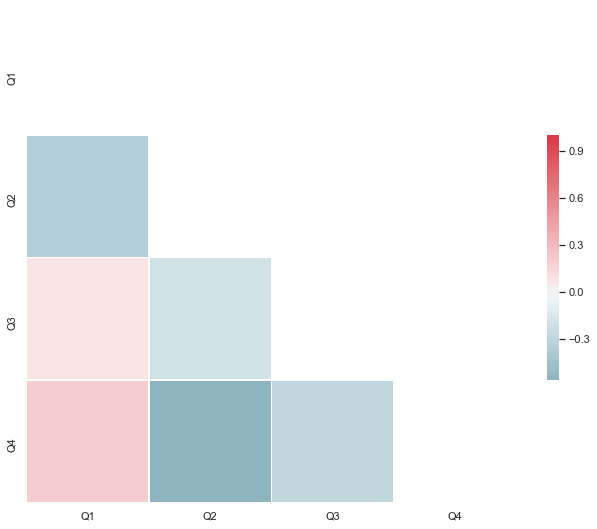

In [134]:
sns.set(style="white")

v = pd.read_json("data\GOOGL-18.json", orient = "columns", precise_float = True)
spring = v["close"]["2018-01-01":"2018-04-03"]
summer = v["close"]["2018-04-03":"2018-06-30"]
fall = v["close"]["2018-07-01":"2018-09-30"]
winter = v["close"]["2018-10-01":"2018-12-31"]
data = pd.DataFrame({"Q1":spring.values, "Q2": summer.values, "Q3": fall.values, "Q4": winter.values})

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [135]:
refine("MSFT","data\MSFT-18-19.json",end = "2018-01-01")

,APO,Aroon Down,Real Middle Band,MIDPOINT,OBV,SINE,QUADRATURE,open,close
2018-01-02,0.9739,0.0000,83.0551,81.7649,-1327663306,-0.9986,-0.2510,86.125,85.95
2018-01-03,0.9085,0.0000,83.2298,81.9800,-1303490242,-0.8919,0.5926,86.055,86.35
2018-01-04,0.8145,0.0000,83.4149,82.0600,-1282344257,-0.1987,0.9346,86.590,87.11
2018-01-05,0.7615,1.6667,83.6113,82.4350,-1259817694,0.8957,0.7489,87.660,88.19
2018-01-08,0.8064,0.0000,83.8133,82.9350,-1239523764,0.9901,0.7452,88.200,88.28
2018-01-09,0.8469,0.0000,84.0039,83.1736,-1258914191,0.8830,0.7783,88.650,88.22
2018-01-10,0.8910,3.3333,84.1759,83.1736,-1277043344,0.7074,0.9302,87.860,87.82
2018-01-11,0.9570,1.6667,84.3479,83.1736,-1260513476,0.4636,1.2114,88.130,88.08
2018-01-12,1.0378,0.0000,84.5505,83.8150,-1236513037,0.1166,0.4887,88.670,89.60
2018-01-16,1.1444,1.6667,84.7662,84.3600,-1272458465,-0.0223,-0.5593,90.100,88.35


In [140]:
d = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NASDAQ:^IXIC&outputsize=full&apikey=1GRE5ATJV155F9RM").json()
d["Time Series (Daily)"]

{'2019-07-11': {'1. open': '8219.0000',
  '2. high': '8226.0000',
  '3. low': '8172.0000',
  '4. close': '8189.0000',
  '5. volume': '1374910000'},
 '2019-07-10': {'1. open': '8183.0000',
  '2. high': '8229.0000',
  '3. low': '8161.0000',
  '4. close': '8203.0000',
  '5. volume': '2060510000'},
 '2019-07-09': {'1. open': '8061.0000',
  '2. high': '8147.0000',
  '3. low': '8061.0000',
  '4. close': '8142.0000',
  '5. volume': '170720000'},
 '2019-07-08': {'1. open': '8113.0000',
  '2. high': '8162.0000',
  '3. low': '8078.0000',
  '4. close': '8098.0000',
  '5. volume': '177320000'},
 '2019-07-05': {'1. open': '8123.0000',
  '2. high': '8172.0000',
  '3. low': '8094.0000',
  '4. close': '8162.0000',
  '5. volume': '149410000'},
 '2019-07-03': {'1. open': '8130.0000',
  '2. high': '8170.0000',
  '3. low': '8122.0000',
  '4. close': '8170.0000',
  '5. volume': '1548190000'},
 '2019-07-02': {'1. open': '8087.0000',
  '2. high': '8109.0000',
  '3. low': '8063.0000',
  '4. close': '8109.0000

In [151]:
info = d["Time Series (Daily)"]
a = pd.read_json("data\MSFT-18-19.json", orient = "columns", precise_float = True)
nas = pd.DataFrame(n["Time Series (Daily)"]).transpose().iloc[::-1]["2018-01-01":"2019-07-08"]
for col in nas.columns:
    a["n" + col[3:]] = nas[col]
a.to_json("data\MSFT-18-19.json")

In [152]:
pd.read_json("data\MSFT-18-19.json", orient = "columns", precise_float = True)

,APO,Aroon Down,Real Middle Band,MIDPOINT,OBV,SINE,QUADRATURE,open,close,nopen,nhigh,nlow,nclose,nvolume
2018-01-02,0.9739,0.0000,83.0551,81.7649,-1327663306,-0.9986,-0.2510,86.125,85.95,6938,7007,6924,7007,1914930000
2018-01-03,0.9085,0.0000,83.2298,81.9800,-1303490242,-0.8919,0.5926,86.055,86.35,7017,7069,7017,7066,2166780000
2018-01-04,0.8145,0.0000,83.4149,82.0600,-1282344257,-0.1987,0.9346,86.590,87.11,7090,7098,7072,7078,2098890000
2018-01-05,0.7615,1.6667,83.6113,82.4350,-1259817694,0.8957,0.7489,87.660,88.19,7106,7137,7097,7137,2020900000
2018-01-08,0.8064,0.0000,83.8133,82.9350,-1239523764,0.9901,0.7452,88.200,88.28,7135,7161,7124,7157,2051430000
2018-01-09,0.8469,0.0000,84.0039,83.1736,-1258914191,0.8830,0.7783,88.650,88.22,7174,7181,7148,7164,2107300000
2018-01-10,0.8910,3.3333,84.1759,83.1736,-1277043344,0.7074,0.9302,87.860,87.82,7130,7154,7112,7154,2122740000
2018-01-11,0.9570,1.6667,84.3479,83.1736,-1260513476,0.4636,1.2114,88.130,88.08,7169,7212,7163,7212,2009740000
2018-01-12,1.0378,0.0000,84.5505,83.8150,-1236513037,0.1166,0.4887,88.670,89.60,7208,7265,7205,7261,1976200000
2018-01-16,1.1444,1.6667,84.7662,84.3600,-1272458465,-0.0223,-0.5593,90.100,88.35,7307,7330,7206,7224,2377140000


In [10]:
refine("BA", "data\BA-18-19.json", "2019-07-08","2018-01-01")

,APO,Aroon Down,Real Middle Band,MIDPOINT,OBV,SINE,QUADRATURE,open,close,nopen,nhigh,nlow,nclose,nvolume
2018-01-02,9.5735,23.3333,273.8766,279.1159,449118176,-0.2768,-6.9583,295.75,296.84,6938,7007,6924,7007,1914930000
2018-01-03,8.4855,21.6667,274.5365,279.1650,452313141,-0.3485,-1.8273,295.94,297.80,7017,7069,7017,7066,2166780000
2018-01-04,7.3583,20.0000,275.1935,279.1900,448275903,-0.4164,-0.2369,297.94,296.67,7090,7098,7072,7078,2098890000
2018-01-05,6.7652,18.3333,275.9907,283.9700,454310596,-0.4982,2.9796,296.77,308.84,7106,7137,7097,7137,2020900000
2018-01-08,6.2881,16.6667,276.8109,284.9550,458280947,-0.5221,3.8938,308.66,310.15,7135,7161,7124,7157,2051430000
2018-01-09,6.3542,15.0000,277.7597,289.4800,463827150,-0.5008,6.7439,310.59,318.43,7174,7181,7148,7164,2107300000
2018-01-10,6.6646,13.3333,278.7324,290.6000,468291833,-0.3944,10.4644,317.49,320.26,7130,7154,7112,7154,2122740000
2018-01-11,7.5301,11.6667,279.8390,293.7250,472917806,-0.1480,18.4621,322.13,328.12,7169,7212,7163,7212,2009740000
2018-01-12,8.6076,10.0000,281.1362,297.9900,479437230,0.2205,24.7107,330.38,336.21,7208,7265,7205,7261,1976200000
2018-01-16,10.2136,8.3333,282.5862,303.4150,467625231,0.5292,17.3685,339.90,335.16,7307,7330,7206,7224,2377140000


In [161]:
sns.set()
df = pd.read_json("data\MSFT.json", orient = "columns", precise_float = True)

network_pal = sns.husl_palette(8, s=.45)

networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns)

sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

KeyError: 'Level network must be same as name (None)'

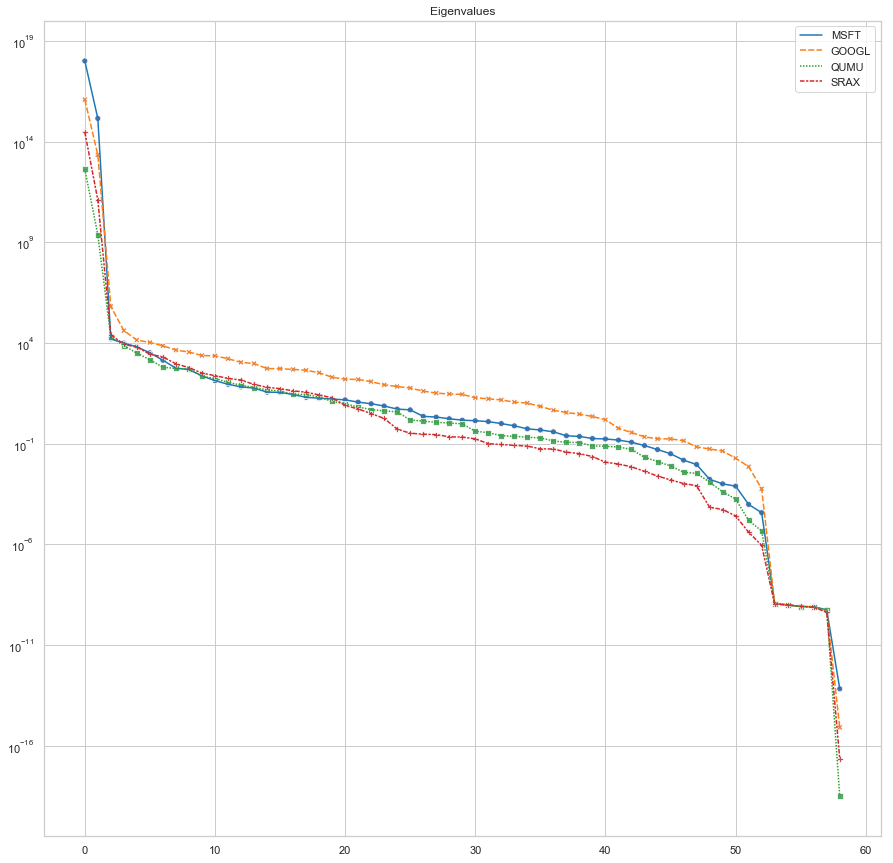

In [25]:
#Plot of SVD Eigenvalues
evals = pd.DataFrame({"MSFT":evals_msft, "GOOGL":evals_googl,"QUMU":evals_qumu, "SRAX":evals_sr})
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
ax.set(yscale="log")
sns.lineplot(data = evals, palette = "tab10", linewidth = 1.5).set_title("Eigenvalues")
g = sns.scatterplot(size=2, data=evals, legend = False)

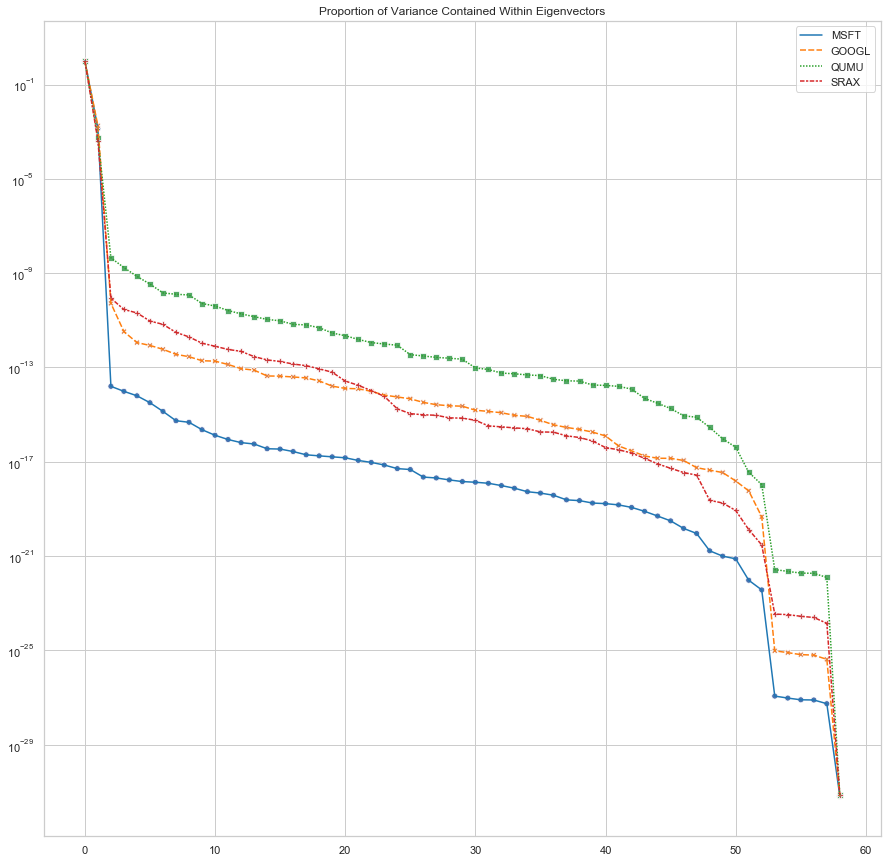

In [105]:
#Proportion of Variance
prop = evals/(evals.sum())
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
ax.set(yscale="log")
sns.lineplot(data = prop, palette = "tab10", linewidth = 1.5).set_title("Proportion of Variance Contained Within Eigenvectors")
g = sns.scatterplot(size=2, data=prop, legend = False)

[0.9986093428194344, 0.998229855760765, 0.9994498138688542, 0.9995809026528306]
[0.9999999999999617, 0.9999999999398314, 0.9999999921403462, 0.9999999998388327]


(0.9975, 1.0001)

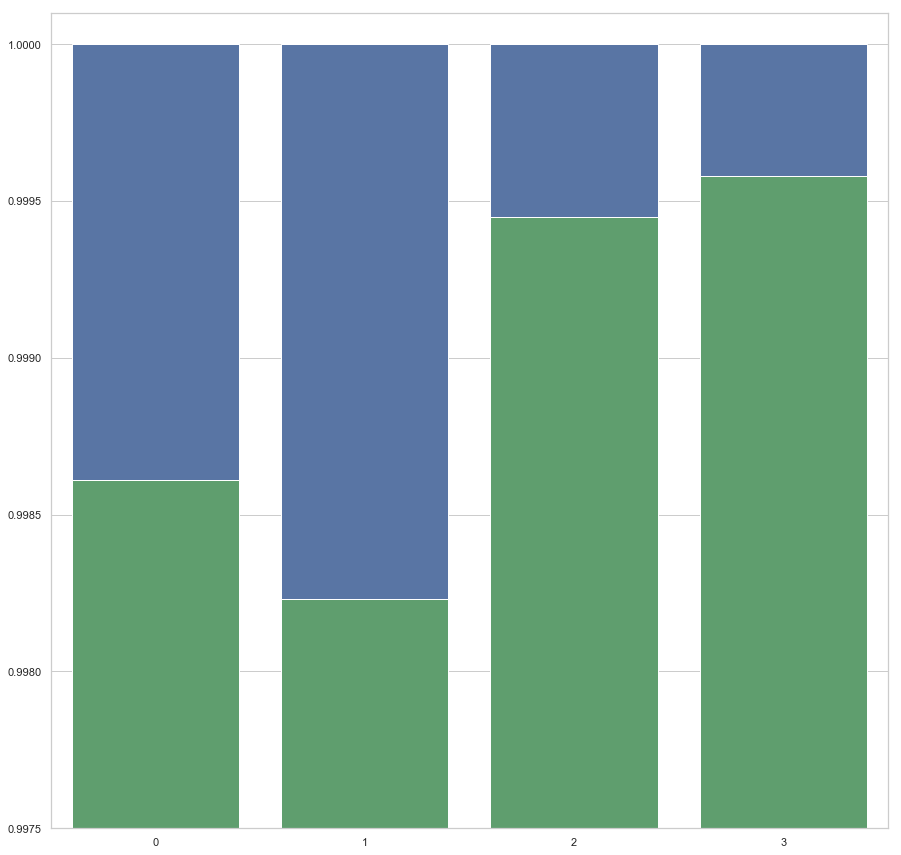

In [114]:
pd.set_option("display.precision", 16)
first = [prop.iloc[0][k] for k in prop.columns]
pair = [prop.iloc[0][k] + prop.iloc[1][k] for k in prop.columns]
print(first)
print(pair)
prop_df = pd.DataFrame({"Top Variance": first, "Pair": pair}).transpose()
prop.columns = ["MSFT", "GOOGL", "QUMU", "SRAX"]
f, ax = plt.subplots(figsize = (15,15))
sns.barplot(data = pd.DataFrame(prop_df.iloc[1]).transpose(), color = "b") 
sns.barplot(data = pd.DataFrame(prop_df.iloc[0]).transpose(), color = "g")
plt.ylim(0.9975,1.0001)

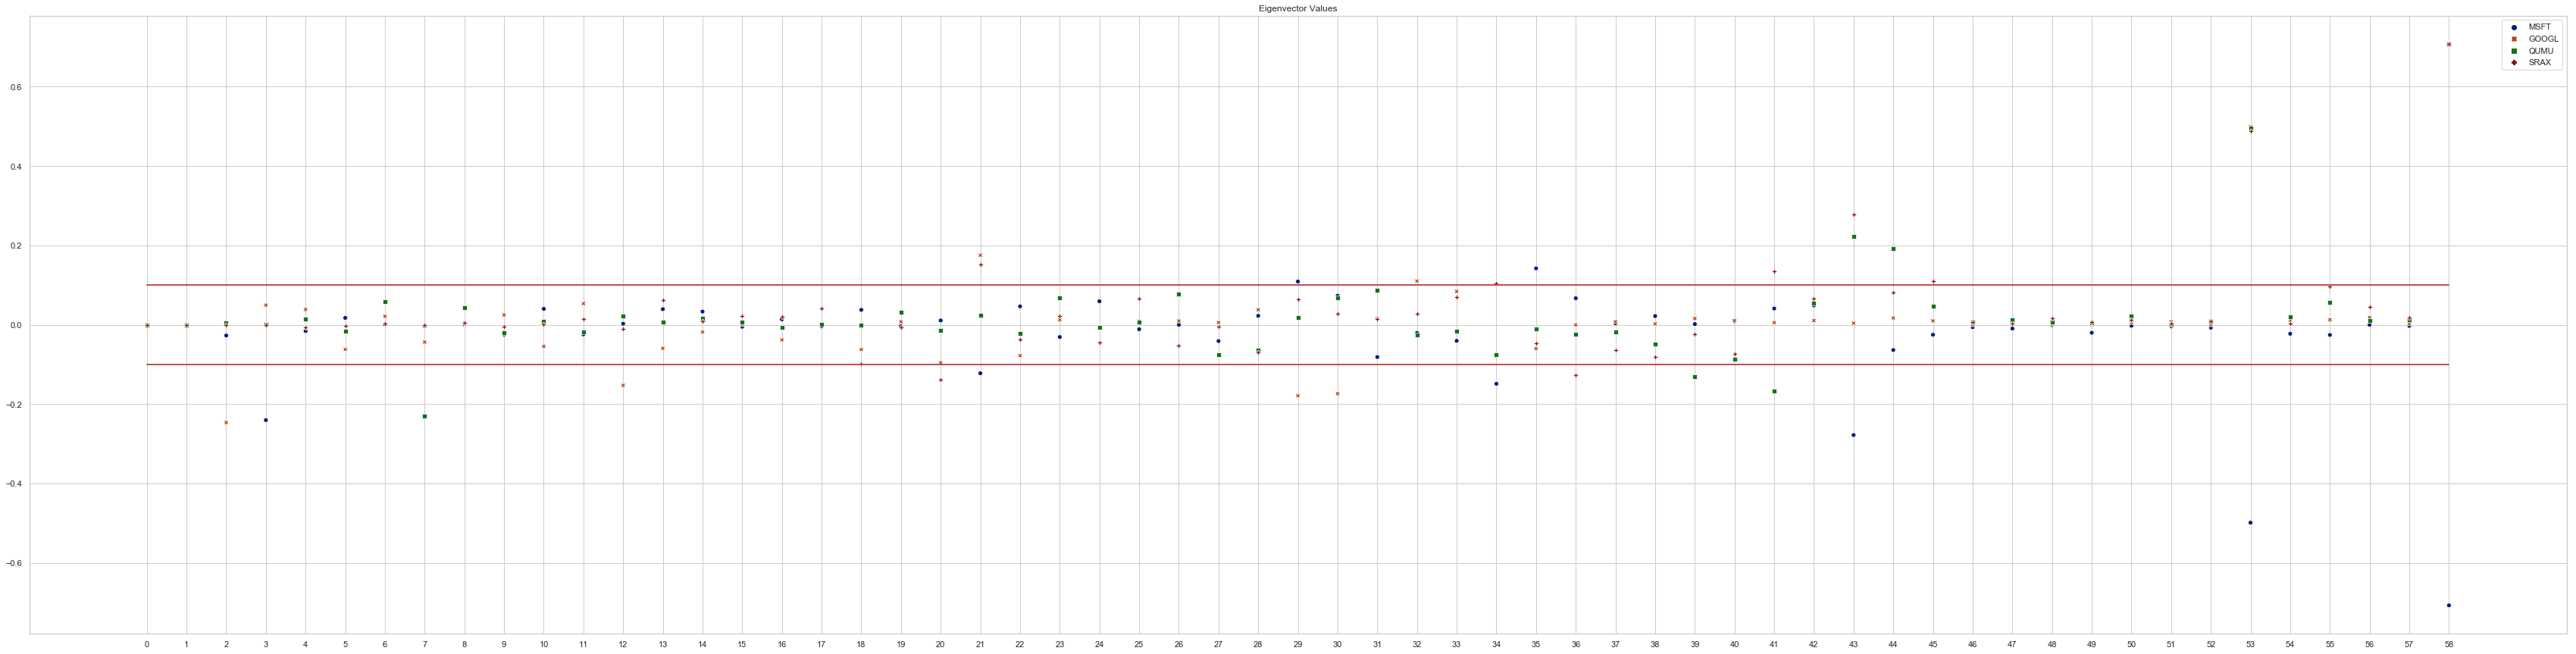

In [84]:
x = np.array([k[0:7] for k in msft_json.columns])
y = pd.DataFrame({"MSFT":evecs_msft[0], "GOOGL": evecs_googl[0], "QUMU":evecs_qumu[0],"SRAX":evecs_sr[0]})
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(60, 15))
sns.lineplot(data = np.ones(59)*0.1, color = "r", linewidth = 2)
sns.lineplot(data = np.ones(59)*(-0.1), color = "r", linewidth = 2)
sns.scatterplot(data = y, palette = "dark", size = 2).set_title("Eigenvector Values")
ax.set_xticks(range(0,59))